In [167]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [168]:
import json
import csv

with open('states_daily.json') as json_file:
    data = json.load(json_file)


covid_data = data['states_daily']
 
data_file = open('data_file.csv', 'w')

csv_writer = csv.writer(data_file)
 
count = 0
 
for x in covid_data:
    if count == 0:
 
        header = x.keys()
        csv_writer.writerow(header)
        count += 1
 
    csv_writer.writerow(x.values())
 
data_file.close()

In [169]:
covid = pd.read_csv('data_file.csv')

In [170]:
covid = pd.DataFrame(covid, columns=["date","dateymd","status","tt","an","ap","ar","as","br","ch","ct","dd","dl","dn","ga","gj","hp","hr","jh","jk","ka","kl","la","ld","mh","ml","mn","mp","mz","nl","or","pb","py","rj","sk","tg","tn","tr","un","up","ut","wb"])

In [171]:
uts = ['dl','an','dn','cg','ld','py','la','jk']

#Question 1.1

In [172]:
con = result[(result['status'] == "Confirmed")]['tt'].sum()

In [173]:
rec = result[(result['status'] == "Recovered")]['tt'].sum()

In [174]:
dec = result[(result['status'] == "Deceased	")]['tt'].sum()

In [175]:
print("Confirmed : {}".format(con) +", "+ "Recovered : {}".format(rec)+", "+"Deceased : {}".format(dec) )


Confirmed : 3985115, Recovered : 3851085, Deceased : 0


#Question 1.2

In [176]:
con_dl = result[(result['status'] == "Confirmed")]['dl'].sum()

In [177]:
rec_dl = result[(result['status'] == "Recovered")]['dl'].sum()


In [178]:
dec_dl = result[(result['status'] == "Deceased	")]['dl'].sum()

In [179]:
print("Delhi Confirmed : {}".format(con_dl) +", "+ "Recovered : {}".format(rec_dl)+", "+"Deceased : {}".format(dec_dl) )

Delhi Confirmed : 186202, Recovered : 176254, Deceased : 0


In [180]:
con_mh = result[(result['status'] == "Confirmed")]['mh'].sum()

In [181]:
rec_mh = result[(result['status'] == "Recovered")]['mh'].sum()

In [182]:
dec_mh = result[(result['status'] == "Deceased	")]['mh'].sum()

In [183]:
print("Maharashtra Confirmed : {}".format(con_mh) +", "+ "Recovered : {}".format(rec_mh)+", "+"Deceased : {}".format(dec_mh) )

Maharashtra Confirmed : 776020, Recovered : 771786, Deceased : 0


In [184]:
con_wb = result[(result['status'] == "Confirmed")]['wb'].sum()

In [185]:
rec_wb = result[(result['status'] == "Recovered")]['wb'].sum()

In [186]:
dec_wb = result[(result['status'] == "Deceased	")]['wb'].sum()

In [187]:
print("West Bengal Confirmed : {}".format(con_wb) +", "+ "Recovered : {}".format(rec_wb)+", "+"Deceased : {}".format(dec_wb) )

West Bengal Confirmed : 191975, Recovered : 169305, Deceased : 0


In [188]:
con_tn = result[(result['status'] == "Confirmed")]['tn'].sum()

In [189]:
rec_tn = result[(result['status'] == "Recovered")]['tn'].sum()

In [190]:
dec_tn = result[(result['status'] == "Deceased	")]['tn'].sum()

In [191]:
print("Tamil Nadu Confirmed : {}".format(con_tn) +", "+ "Recovered : {}".format(rec_tn)+", "+"Deceased : {}".format(dec_tn) )

Tamil Nadu Confirmed : 313324, Recovered : 289304, Deceased : 0


#Question 1.3

In [192]:
Covid = pd.DataFrame(covid, columns=["date","dateymd","status","tt","an","ap","ar","as","br","ch","ct","dd","dl","dn","ga","gj","hp","hr","jh","jk","ka","kl","la","ld","mh","ml","mn","mp","mz","nl","or","pb","py","rj","sk","tg","tn","tr","un","up","ut","wb"])

In [193]:
Confi = Covid[(Covid['status'] == "Confirmed")]

In [194]:
Confi = Confi.iloc[:,4:]

In [195]:
temp_rate = pd.DataFrame(columns = ['State','confirm_cases'])

In [196]:
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  con_cases = columnData.values.sum()
  temp_rate = temp_rate.append({'State':state,'confirm_cases':con_cases},ignore_index = True)


In [197]:
Confi = Covid[(Covid['status'] == "Recovered")]

In [198]:
Confi = Confi.iloc[:,4:]

In [199]:
recovery_rate = pd.DataFrame(columns = ['State','Recovery_rate'])

In [200]:
i=0
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  rec_cases = columnData.values.sum()
  act_cases = temp_rate.iloc[i]['confirm_cases']
  if(act_cases == 0):
    rate = 0.0
  else:
    rate = rec_cases/act_cases
  i=i+1
  recovery_rate = recovery_rate.append({'State':state,'Recovery_rate':rate},ignore_index = True)

In [201]:
high_rate = recovery_rate.sort_values(by=['Recovery_rate'], ascending=False)

In [202]:
highest_rate = high_rate.iloc[0:10, :]

In [203]:
highest_rate

,State,Recovery_rate
22,rj,0.990425
8,gj,0.987567
17,mp,0.986606
10,hr,0.986592
28,up,0.986422
3,br,0.986407
4,ch,0.986233
5,ct,0.985370
11,jh,0.984637
0,ap,0.984519


In [204]:
low_rate = recovery_rate.sort_values(by=['Recovery_rate'])

In [205]:
lowest_rate = low_rate.iloc[0:10, :]

In [206]:
lowest_rate

,State,Recovery_rate
6,dd,0.000000
27,un,0.000000
18,mz,0.813923
23,sk,0.905324
19,nl,0.912305
16,mn,0.926487
15,ml,0.929457
13,kl,0.948274
1,ar,0.959448
29,ut,0.959831


#Question 1.4

In [207]:
Confi = Covid[(Covid['status'] == "Confirmed")]

In [208]:
Confi = Confi.iloc[:,4:]

In [209]:
confirmed_df = pd.DataFrame(columns = ['State','confirm_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  con_cases = columnData.values.sum()
  confirmed_df = confirmed_df.append({'State':state,'confirm_cases':con_cases},ignore_index = True)


In [210]:
confirmed_df = confirmed_df.sort_values(by=['confirm_cases'], ascending=False)

In [211]:
highest_affected = confirmed_df.iloc[0:3, :]

In [212]:
highest_affected

,State,confirm_cases
14,mh,6396805
13,kl,3702417
12,ka,2930529


In [213]:
Confi = Covid[(Covid['status'] == "Recovered")]
Confi = Confi.iloc[:,4:]
recovered_df = pd.DataFrame(columns = ['State','recover_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  rec_cases = columnData.values.sum()
  recovered_df = recovered_df.append({'State':state,'recover_cases':rec_cases},ignore_index = True)
recovered_df = recovered_df.sort_values(by=['recover_cases'], ascending=False)
Rec_highest_affected = recovered_df.iloc[0:3, :]
Rec_highest_affected

,State,recover_cases
14,mh,6195744
13,kl,3510904
12,ka,2871449


In [214]:
Confi = Covid[(Covid['status'] == "Deceased")]
Confi = Confi.iloc[:,4:]
deceased_df = pd.DataFrame(columns = ['State','dec_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  ddec_cases = columnData.values.sum()
  deceased_df = deceased_df.append({'State':state,'dec_cases':ddec_cases},ignore_index = True)
deceased_df = deceased_df.sort_values(by=['dec_cases'], ascending=False)
Dec_highest_affected = deceased_df.iloc[0:3, :]
Dec_highest_affected

,State,dec_cases
14,mh,135138
12,ka,37014
25,tn,34547


#Question 1.5

In [215]:
Confi = Covid[(Covid['status'] == "Confirmed")]
Confi = Confi.iloc[:,4:]
confirmed_df = pd.DataFrame(columns = ['State','confirm_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  con_cases = columnData.values.sum()
  confirmed_df = confirmed_df.append({'State':state,'confirm_cases':con_cases},ignore_index = True)
confirmed_df = confirmed_df.sort_values(by=['confirm_cases'])
lowest_affected = confirmed_df.iloc[0:3, :]
lowest_affected

,State,confirm_cases
27,un,0
6,dd,0
23,sk,28740


In [216]:
Confi = Covid[(Covid['status'] == "Recovered")]
Confi = Confi.iloc[:,4:]
recovered_df = pd.DataFrame(columns = ['State','recover_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  rec_cases = columnData.values.sum()
  recovered_df = recovered_df.append({'State':state,'recover_cases':rec_cases},ignore_index = True)
recovered_df = recovered_df.sort_values(by=['recover_cases'])
Rec_lowest_affected = recovered_df.iloc[0:3, :]
Rec_lowest_affected

,State,recover_cases
27,un,0
6,dd,0
23,sk,26019


In [217]:
Confi = Covid[(Covid['status'] == "Deceased")]
Confi = Confi.iloc[:,4:]
deceased_df = pd.DataFrame(columns = ['State','dec_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  if state in uts :
    continue
  ddec_cases = columnData.values.sum()
  deceased_df = deceased_df.append({'State':state,'dec_cases':ddec_cases},ignore_index = True)
deceased_df = deceased_df.sort_values(by=['dec_cases'])
Dec_lowest_affected = deceased_df.iloc[0:3, :]
Dec_lowest_affected

,State,dec_cases
6,dd,0
27,un,0
18,mz,184


#Question 1.7

In [218]:
Covid = pd.DataFrame(covid, columns=["date","dateymd","status","tt","an","ap","ar","as","br","ch","ct","dd","dl","dn","ga","gj","hp","hr","jh","jk","ka","kl","la","ld","mh","ml","mn","mp","mz","nl","or","pb","py","rj","sk","tg","tn","tr","un","up","ut","wb"])

In [219]:
Confi = Covid[(Covid['status'] == "Confirmed")]

In [220]:
Confi = Confi.iloc[:,4:]

In [221]:
temp_confirm = pd.DataFrame(columns = ['State','confirm_cases'])

In [222]:
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  con_cases = columnData.values.sum()
  temp_confirm = temp_confirm.append({'State':state,'confirm_cases':con_cases},ignore_index = True)


In [223]:
Confi = Covid[(Covid['status'] == "Recovered")]

In [224]:
Confi = Confi.iloc[:,4:]

In [225]:
temp_recov = pd.DataFrame(columns = ['State','recov_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  con_cases = columnData.values.sum()
  temp_recov = temp_recov.append({'State':state,'recov_cases':con_cases},ignore_index = True)


In [226]:
Confi = Covid[(Covid['status'] == "Deceased")]
Confi = Confi.iloc[:,4:]
temp_desc = pd.DataFrame(columns = ['State','desc_cases'])
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  con_cases = columnData.values.sum()
  temp_desc = temp_desc.append({'State':state,'desc_cases':con_cases},ignore_index = True)

In [227]:
active_df = pd.DataFrame(columns = ['State','Active_cases'])

In [228]:
i=0
for (columnName, columnData) in Confi.iteritems():
  state = columnName
  confirm_cases = temp_confirm.iloc[i]['confirm_cases']
  rec_cases = temp_recov.iloc[i]['recov_cases']
  dec_cases = temp_desc.iloc[i]['desc_cases']
  act_cases = confirm_cases - (rec_cases + dec_cases)
  i=i+1
  active_df = active_df.append({'State':state,'Active_cases':act_cases},ignore_index = True)

In [229]:
active_df

,State,Active_cases
0,an,6
1,ap,17218
2,ar,1837
3,as,8947
4,br,213
5,ch,43
6,ct,1138
7,dd,0
8,dl,467
9,dn,-18


#Question 2.1

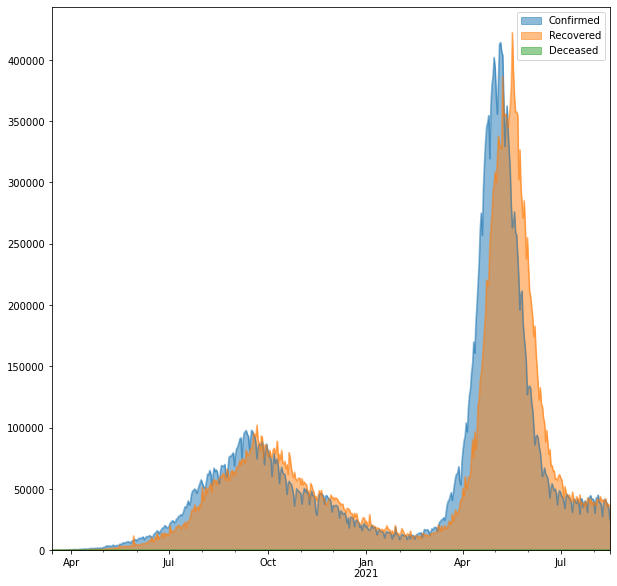

In [230]:
df = pd.DataFrame(columns = ['Confirmed','Recovered','Deceased'])
con = list();
Plotter = Covid.iloc[:,:4]
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['tt']
  recov = Plotter.iloc[i+1]['tt']
  desc = Plotter.iloc[i+2]['tt']
  array = [confirm, recov, deceas]
  con.append(array)
  
df = pd.DataFrame(data=con, columns = ['Confirmed','Recovered','Deceased'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.area(stacked=False,figsize=(10, 10));
plt.show()

#Question 2.2

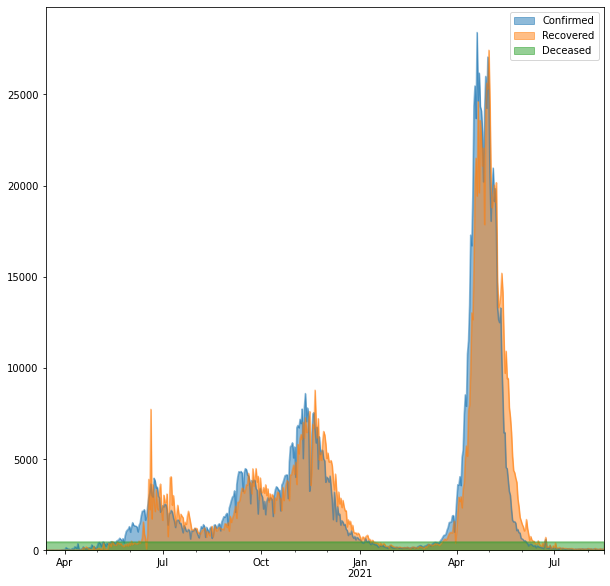

In [231]:
df = pd.DataFrame(columns = ['Confirmed','Recovered','Deceased'])
Plotter = Covid
con = list();
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['dl']
  recov = Plotter.iloc[i+1]['dl']
  desc = Plotter.iloc[i+2]['dl']
  array = [confirm, recov, deceas]
  con.append(array)
  
df = pd.DataFrame(data=con, columns = ['Confirmed','Recovered','Deceased'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.area(stacked=False,figsize=(10, 10));
plt.show()

#Question 2.3

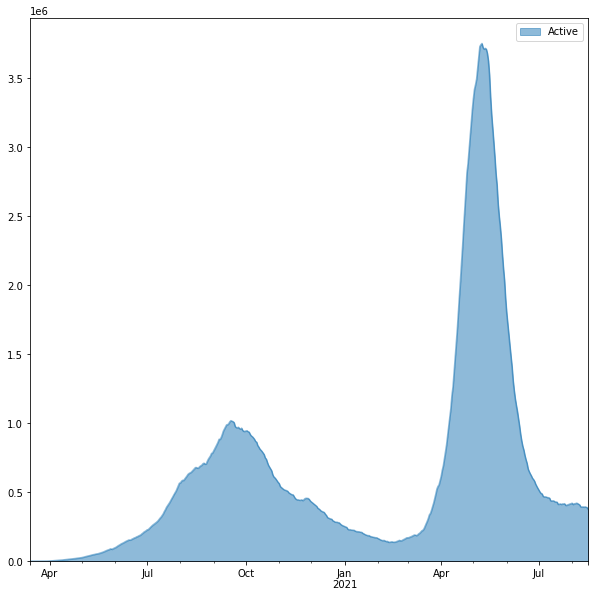

In [232]:

Plotter = Covid
con = []
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['tt']
  recov = Plotter.iloc[i+1]['tt']
  desc = Plotter.iloc[i+2]['tt']
  Active = confirm-(recov+desc)
  if i>0:
    Active = Active+con[-1]
  con.append(Active)
  
df = pd.DataFrame(data=con, columns = ['Active'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.area(stacked=False,figsize=(10, 10));
plt.show()

#Question 2.4

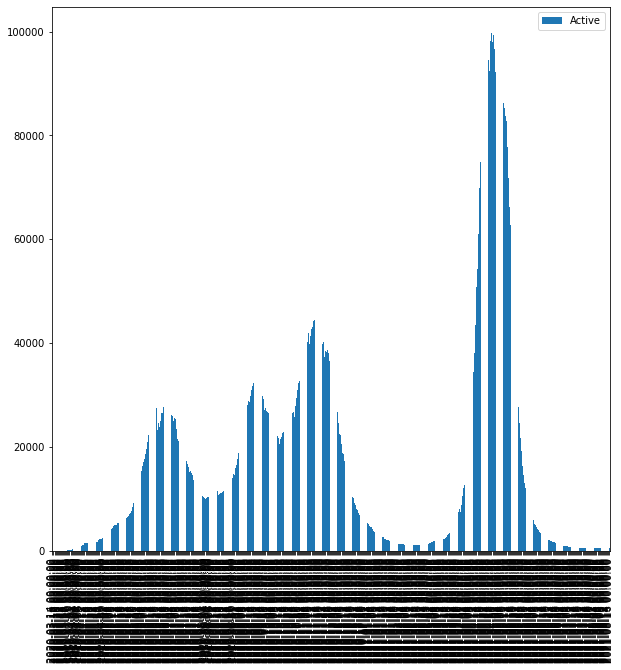

In [233]:
Plotter = Covid
con = []
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['dl']
  recov = Plotter.iloc[i+1]['dl']
  desc = Plotter.iloc[i+2]['dl']
  Active = confirm-(recov+desc)
  if i>0:
    Active = Active+con[-1]
  con.append(Active)
  
df = pd.DataFrame(data=con, columns = ['Active'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.bar(stacked=True,figsize=(10, 10));


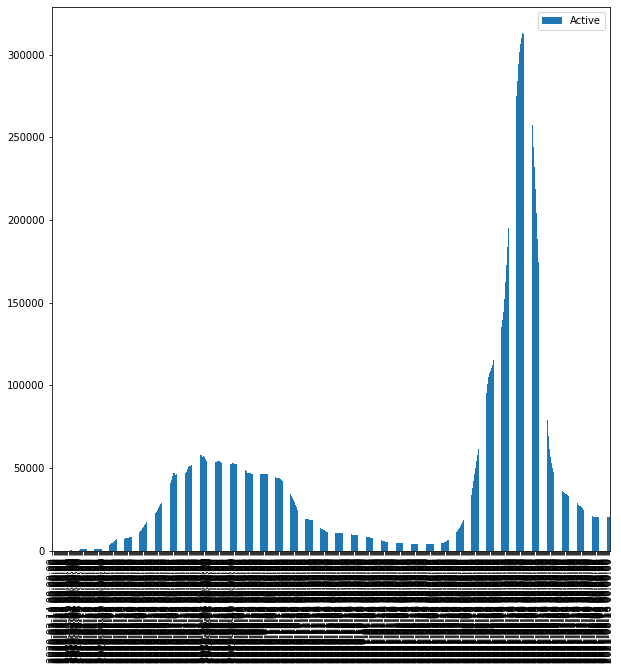

In [234]:
Plotter = Covid
con = []
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['tn']
  recov = Plotter.iloc[i+1]['tn']
  desc = Plotter.iloc[i+2]['tn']
  Active = confirm-(recov+desc)
  if i>0:
    Active = Active+con[-1]
  con.append(Active)
  
df = pd.DataFrame(data=con, columns = ['Active'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.bar(stacked=True,figsize=(10, 10));

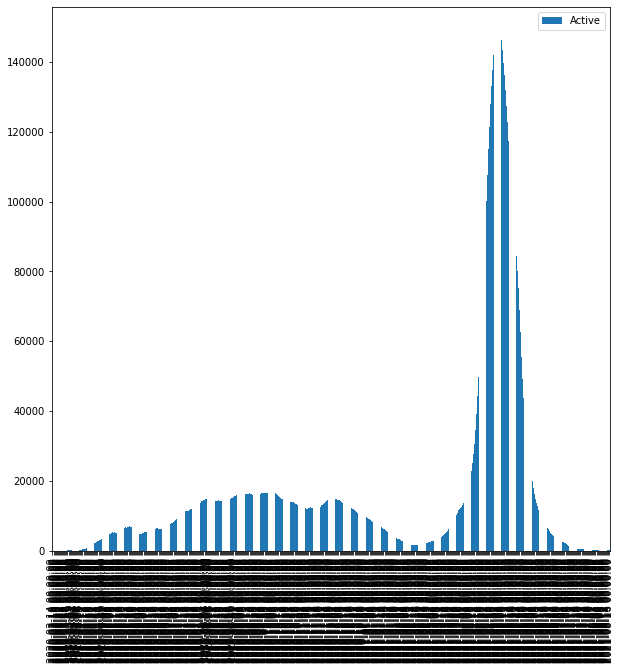

In [235]:
Plotter = Covid
con = []
idx = Plotter.index
rows = len(idx)-2
for i in range(0,rows,3):
  confirm = Plotter.iloc[i]['gj']
  recov = Plotter.iloc[i+1]['gj']
  desc = Plotter.iloc[i+2]['gj']
  Active = confirm-(recov+desc)
  if i>0:
    Active = Active+con[-1]
  con.append(Active)
  
df = pd.DataFrame(data=con, columns = ['Active'], index=pd.date_range(start='2020/03/14', end='2021/08/16',
                       freq='D'))
                       
df.plot.bar(stacked=True,figsize=(10, 10));